# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.148322e+01     7.667066e+00
 * time: 0.0049359798431396484
     1     2.902328e+01     4.625240e+00
 * time: 0.014835834503173828
     2     2.321254e+01     6.066281e+00
 * time: 0.038890838623046875
     3     1.396248e+01     2.831156e+00
 * time: 0.06740188598632812
     4     1.153141e+01     1.138594e+00
 * time: 0.09142494201660156
     5     1.072855e+01     8.173944e-01
 * time: 0.11540889739990234
     6     1.008490e+01     1.281582e+00
 * time: 0.5454559326171875
     7     9.465288e+00     8.261612e-01
 * time: 0.563493013381958
     8     9.098994e+00     5.959201e-01
 * time: 0.5811858177185059
     9     8.923973e+00     4.612614e-01
 * time: 0.5989868640899658
    10     8.891479e+00     1.426008e+00
 * time: 0.6124248504638672
    11     8.854264e+00     8.893195e-01
 * time: 0.6259059906005859
    12     8.786001e+00     5.704170e-01
 * time: 0.6435568332672119
    13     8.710512e+00     5.230891e-01
 * time: 0.6

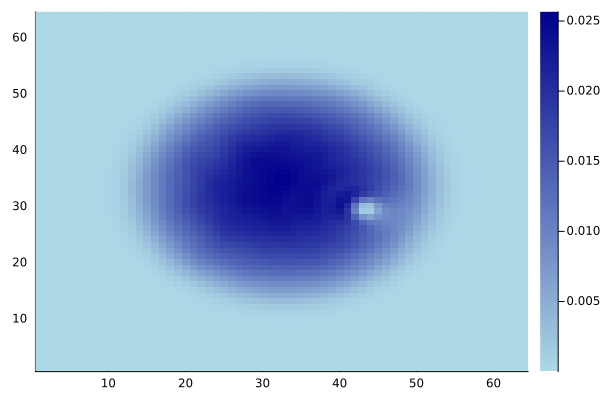

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)